In [5]:
#!pip install torch
#!pip install torchvision
#!pip install h5py

In [1]:
from helper_functions import * 

In [4]:
lookid_data.head(10)

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN
5,6,1,left_eye_inner_corner_y,NaN
6,7,1,left_eye_outer_corner_x,NaN
7,8,1,left_eye_outer_corner_y,NaN
8,9,1,right_eye_inner_corner_x,NaN
9,10,1,right_eye_inner_corner_y,NaN


In [5]:
train_data.head(2)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...


In [6]:
training.head(2).T

NameError: name 'training' is not defined

In [ ]:
print(train_data.columns)
print('Shape')
print(train_data.shape)


In [7]:
print('28 features with NA')
print(train_data.isnull().any().value_counts())

print('Number of images', len(training))
print('Number of images when we drop data with any NA:', len(train_data.dropna()))

print('Images with the following missing')
print(training.isna().sum())

28 features with NA
True     28
False     3
dtype: int64


NameError: name 'training' is not defined

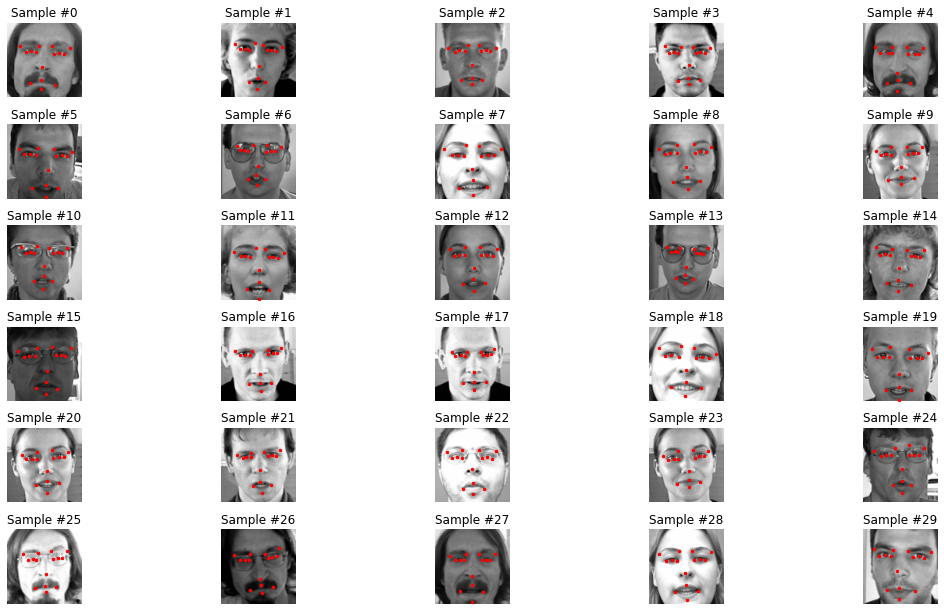

In [8]:
# examples of images with marks for facial keypoints
show_images(train_data, range(30))

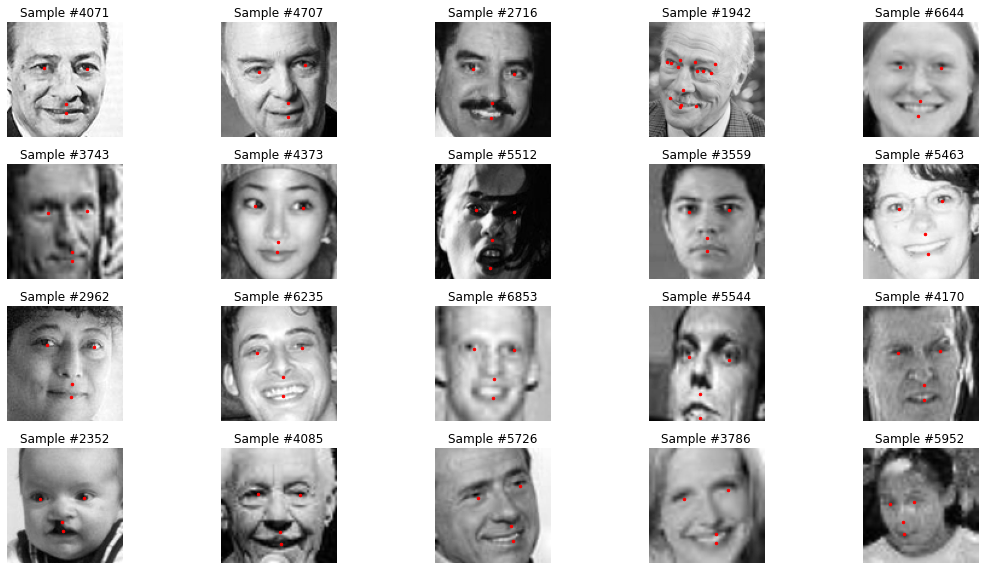

In [9]:
# examples of images with missing data
missing_any_data = train_data[train_data.isnull().any(axis=1)]
idxs = np.random.choice(missing_any_data.index, 20)
show_images(train_data, idxs)
#Most missing features seem to be rotated images
#Others: blurry, sharpening images, shadows 
#cropped images 

In [10]:
# Baseline - drop images with missing keypoints
train_df = train_data.dropna()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140 entries, 0 to 2283
Data columns (total 31 columns):
left_eye_center_x            2140 non-null float64
left_eye_center_y            2140 non-null float64
right_eye_center_x           2140 non-null float64
right_eye_center_y           2140 non-null float64
left_eye_inner_corner_x      2140 non-null float64
left_eye_inner_corner_y      2140 non-null float64
left_eye_outer_corner_x      2140 non-null float64
left_eye_outer_corner_y      2140 non-null float64
right_eye_inner_corner_x     2140 non-null float64
right_eye_inner_corner_y     2140 non-null float64
right_eye_outer_corner_x     2140 non-null float64
right_eye_outer_corner_y     2140 non-null float64
left_eyebrow_inner_end_x     2140 non-null float64
left_eyebrow_inner_end_y     2140 non-null float64
left_eyebrow_outer_end_x     2140 non-null float64
left_eyebrow_outer_end_y     2140 non-null float64
right_eyebrow_inner_end_x    2140 non-null float64
right_eyebrow_inner_end_y 

In [11]:
imag = []
for i in range(0,len(train_df['Image'])):
    img = train_data['Image'][i].split(' ')
    img = ['0' if x == '' else x for x in img]
    imag.append(img)
    
image_list = np.array(imag,dtype = 'float')
X_train = image_list.reshape(-1,96,96,1)

train_y = train_df.drop('Image',axis = 1)

y_train = []
for i in range(0,len(train_y)):
    y = train_y.iloc[i,:]
    y_train.append(y)
    
y_train = np.array(y_train,dtype = 'float')

Number of images:  2140


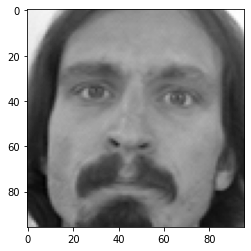

In [12]:
print('Number of images: ', len(image_list))
plt.imshow(X_train[0].reshape(96,96),cmap='gray')
plt.show()

In [21]:
#Baseline CNN Model 
model = Sequential([Flatten(input_shape=(96,96)),
                         Dense(128, activation="relu"),
                         Dropout(0.1),
                         Dense(64, activation="relu"),
                         Dense(30)
                         ])

model = Sequential()

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
# model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 96, 96, 32)        288       
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 96, 96, 32)        9216      
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 48, 48, 32)       

In [22]:
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mae'])

In [23]:
model.fit(X_train,y_train,epochs = 50,batch_size = 256,validation_split = 0.2)

Epoch 1/50
8/8 [==============================] - 91s 11s/step - loss: 974.5916 - mae: 24.4628 - val_loss: 1816.6433 - val_mae: 39.6074
Epoch 2/50
8/8 [==============================] - 57s 7s/step - loss: 87.9783 - mae: 7.4872 - val_loss: 1386.6230 - val_mae: 34.2894
Epoch 3/50
8/8 [==============================] - 42s 5s/step - loss: 51.7341 - mae: 5.6932 - val_loss: 643.2236 - val_mae: 23.1471
Epoch 4/50
8/8 [==============================] - 40s 5s/step - loss: 36.5738 - mae: 4.7818 - val_loss: 281.4933 - val_mae: 15.0444
Epoch 5/50
8/8 [==============================] - 42s 5s/step - loss: 32.0463 - mae: 4.4840 - val_loss: 135.5990 - val_mae: 10.0825
Epoch 6/50
8/8 [==============================] - 42s 5s/step - loss: 29.3737 - mae: 4.2867 - val_loss: 96.6918 - val_mae: 8.3118
Epoch 7/50
8/8 [==============================] - 42s 5s/step - loss: 27.2571 - mae: 4.1204 - val_loss: 79.5805 - val_mae: 7.4268
Epoch 8/50
8/8 [==============================] - 43s 5s/step - loss: 26.31

In [ ]:
#Save model 
# serialize model to JSON
model_json = model.to_json()
with open("baseline_cnn_no_missing.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("baseline_cnn_no_missing.h5")
print("Saved model to disk")

In [ ]:
# load json and create model
json_file = open('baseline_cnn_no_missing.json', 'r')
baseline_cnn_no_missing_json = json_file.read()
json_file.close()
baseline_cnn_no_missing_model = model_from_json(baseline_cnn_no_missing_json)
# load weights into new model
baseline_cnn_no_missing_model.load_weights("baseline_cnn_no_missing.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

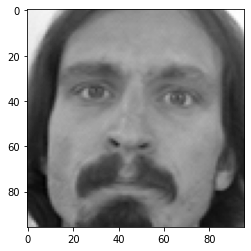

In [23]:
#Rotate and data augment 

# convert to numpy array
data = X_train[0]
plt.imshow(data.reshape(96,96),cmap='gray')
plt.show()
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-2,2])
# prepare iterator
it = datagen.flow(samples, batch_size=1)


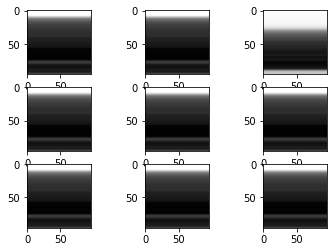

In [18]:
# generate samples and plot
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image.reshape(96,96),cmap='gray')
# show the figure
plt.show()

In [ ]:
#

In [ ]:
#Normalize data

In [ ]:
#Edge detection

In [ ]:
#Sharpening

In [ ]:
#Blurry 

In [ ]:
#Data augmentation - rotation 